<a href="https://colab.research.google.com/github/totobulu/dark-forest-novel/blob/main/Language_generation_mytext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import random
import shutil
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras import models, layers
from tqdm import tqdm
import numpy as np

In [ ]:
def split_file(input_file, num_splits=20, output_folder="output_files"):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the input file and read all lines
    with open(input_file, 'r') as f:
        lines = f.readlines()

    # Calculate number of lines in each split
    total_lines = len(lines)
    lines_per_split = total_lines // num_splits
    extra_lines = total_lines % num_splits  # to account for any remainder lines

    # Split the file into smaller files
    for i in range(num_splits):
        # Determine the start and end index for each split
        start_idx = i * lines_per_split
        end_idx = (i + 1) * lines_per_split

        # If there are extra lines, distribute them among the first files
        if i < extra_lines:
            end_idx += 1

        # Extract the corresponding lines for this split
        split_lines = lines[start_idx:end_idx]

        # Write the lines to a new file inside the output folder
        output_file = os.path.join(output_folder, f"split_file_{i+1}.txt")
        with open(output_file, 'w') as split_f:
            split_f.writelines(split_lines)

        print(f"Created {output_file} with {len(split_lines)} lines")


# create 20 files
split_file("The Dark Forest - Cixin Liu.txt", num_splits=20, output_folder="output_files")

Created output_files/split_file_1.txt with 504 lines
Created output_files/split_file_2.txt with 504 lines
Created output_files/split_file_3.txt with 504 lines
Created output_files/split_file_4.txt with 504 lines
Created output_files/split_file_5.txt with 504 lines
Created output_files/split_file_6.txt with 503 lines
Created output_files/split_file_7.txt with 503 lines
Created output_files/split_file_8.txt with 503 lines
Created output_files/split_file_9.txt with 503 lines
Created output_files/split_file_10.txt with 503 lines
Created output_files/split_file_11.txt with 503 lines
Created output_files/split_file_12.txt with 503 lines
Created output_files/split_file_13.txt with 503 lines
Created output_files/split_file_14.txt with 503 lines
Created output_files/split_file_15.txt with 503 lines
Created output_files/split_file_16.txt with 503 lines
Created output_files/split_file_17.txt with 503 lines
Created output_files/split_file_18.txt with 503 lines
Created output_files/split_file_19.tx

In [ ]:
!rm -rf dataset

In [ ]:
# Where the text files are going to live.
dataset_path = "dataset"
dataset_path_all = os.path.join(dataset_path, "all")
dataset_path_train = os.path.join(dataset_path, "train")
dataset_path_valid = os.path.join(dataset_path, "valid")

# Just use 20 files.
file_number = 20

# Gather the corpus if it has not been gathered yet.
if not os.path.exists(dataset_path):

    # Create all the folders.
    for path in [dataset_path, dataset_path_all, dataset_path_train, dataset_path_valid]:
        if not os.path.exists(path):
            os.mkdir(path)

    # Find all the files.
    paths_all = 'output_files'
    paths_all = glob.glob(os.path.join(paths_all, "*.txt"))
    paths_all = sorted(paths_all)
    print(paths_all)

    # Standardize.
    for path in paths_all:
        content = open(path).read()
        content = content.lower()
        for punctuation in ".,:;?!":
            content = content.replace(punctuation, " " + punctuation)
        open(path, "w").write(content)

    # Do not use all.
    paths_all = paths_all[:file_number]

    # Split 80/20.
    split_index = int(len(paths_all) * 0.8)
    paths_train = paths_all[:split_index]
    paths_valid = paths_all[split_index:]

    # Copy files.
    def copy(paths, destination):
        for path in paths:
            shutil.copy2(path, destination)
    copy(paths_all, dataset_path_all)
    copy(paths_train, dataset_path_train)
    copy(paths_valid, dataset_path_valid)


    # Done.
    print("Corpus copied.")


['output_files/split_file_1.txt', 'output_files/split_file_10.txt', 'output_files/split_file_11.txt', 'output_files/split_file_12.txt', 'output_files/split_file_13.txt', 'output_files/split_file_14.txt', 'output_files/split_file_15.txt', 'output_files/split_file_16.txt', 'output_files/split_file_17.txt', 'output_files/split_file_18.txt', 'output_files/split_file_19.txt', 'output_files/split_file_2.txt', 'output_files/split_file_20.txt', 'output_files/split_file_3.txt', 'output_files/split_file_4.txt', 'output_files/split_file_5.txt', 'output_files/split_file_6.txt', 'output_files/split_file_7.txt', 'output_files/split_file_8.txt', 'output_files/split_file_9.txt']
Corpus copied.


## Data

In [ ]:
batch_size = 32  # not for SGD
seed = 42

def create_dataset(dataset_path):
  dataset = preprocessing.text_dataset_from_directory(
      dataset_path,
      labels=None,
      batch_size=batch_size,
      seed = seed

  )
  return dataset

dataset_original_all = create_dataset(dataset_path_all)
dataset_original_train = create_dataset(dataset_path_train)
dataset_original_valid = create_dataset(dataset_path_valid)

Found 20 files.
Found 16 files.
Found 4 files.


In [ ]:
for x in dataset_original_all.take(1):
    print(x.shape)
    print(x[0])

(20,)
tf.Tensor(b'the representative of the asian fleet completed his thought . \xe2\x80\x9cbut there\xe2\x80\x99s another possibility : the most frightening thing about the situation is the fact that there aren\xe2\x80\x99t any signs .\xe2\x80\x9d\n\n*\n\nluo ji and shi qiang walked through the underground city shaded by the tree-shaped structures as streams of cars flew through the gaps in the sky above them . because the buildings were \xe2\x80\x9cleaves\xe2\x80\x9d hanging in the air , the ground was wide open , and the widely spaced trunks of the giant trees meant there was no sense of streets , just a rolling plaza dotted with tree trunks . the environment was wonderful : the wide swaths of grasses , forests of actual trees , and fresh air all made it look at first glance like beautiful countryside . pedestrians passed through in shining clothes like glowing ants . luo ji was impressed to no end by the urban design that elevated modern noise and crowdedness into the air and let t

# create the text vectorizer.

In [ ]:
vocabulary_size = 15_000

encoder =layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=None,
    split="whitespace",
    output_mode="int"
)
encoder.adapt(dataset_original_all)

vocabulary = encoder.get_vocabulary()

print(vocabulary)

['', '[UNK]', 'the', '.', ',', 'of', 'a', 'to', 'and', 'in', 'that', 'he', 'was', '.”', 'it', 'you', 'had', 'his', 'but', 'on', 'at', 'is', 'for', 'as', 'this', 'be', 'with', 'i', 'said', 'from', '?”', 'they', 'luo', 'like', 'not', 'were', 'an', 'have', 'out', 'ji', 'him', 'then', ':', 'up', 'one', 'all', ',”', 'by', 'so', 'space', 'when', 'been', 'into', 'would', '?', 'time', 'their', 'are', 'we', 'just', 'your', 'them', 'two', 'if', 'no', 'now', 'will', 'her', 'only', 'its', 'about', 'what', 'shi', 'she', 'even', 'there', 'can', 'it’s', 'or', 'first', 'still', 'do', 'fleet', 'more', 'zhang', 'me', 'could', 'through', 'people', 'after', 'my', 'than', 'before', 'qiang', 'world', 'know', 'don’t', 'looked', 'eyes', 'over', 'wallfacer', 'three', 'back', 'system', 'earth', 'who', 'other', 'any', 'has', 'asked', 'which', 'right', '“i', 'down', 'years', 'beihai', 'turned', 'sun', 'long', 'because', 'i’m', 'off', 'did', 'our', 'really', 'life', 'light', 'how', 'think', 'us', 'rey', 'most', 'g

# Create dataset for autoregression.

In [ ]:
sequence_length = 32
padding_token_id = 0

def create_dataset_for_autoregression(dataset, hop_length=1):
  x_inputs = []
  y_outputs = []

  for books in dataset:

    books = encoder(books).numpy()

    for book in books:

      #remove the padding tokens.
      book = [index for index in list(book) if index != padding_token_id]

      for start_index in range(0, len(book) - sequence_length, hop_length):
          x = book[start_index:start_index + sequence_length]
          y = book[start_index + 1: start_index + sequence_length + 1]
          assert len(x) == sequence_length
          assert len(y) == sequence_length

          x_inputs += [x]
          y_outputs += [y]


  return tf.data.Dataset.from_tensor_slices((x_inputs, y_outputs))

dataset_train = create_dataset_for_autoregression(dataset_original_train)
dataset_valid = create_dataset_for_autoregression(dataset_original_valid)

In [ ]:
def decode(indices):
  return " ".join([vocabulary[index] for index in indices])

for input, output in dataset_train.take(8):
  print("in:", decode(input))
  print("out:", decode(output))
  print("")

in: the assailant was brought in right after luo ji had finished eating . he had a handsome european face , but his most prominent feature was his slight smile , a smile
out: assailant was brought in right after luo ji had finished eating . he had a handsome european face , but his most prominent feature was his slight smile , a smile that

in: assailant was brought in right after luo ji had finished eating . he had a handsome european face , but his most prominent feature was his slight smile , a smile that
out: was brought in right after luo ji had finished eating . he had a handsome european face , but his most prominent feature was his slight smile , a smile that seemed

in: was brought in right after luo ji had finished eating . he had a handsome european face , but his most prominent feature was his slight smile , a smile that seemed
out: brought in right after luo ji had finished eating . he had a handsome european face , but his most prominent feature was his slight smile , a s

In [ ]:
import matplotlib.pyplot as plt

def render_history(history):
    plt.title("Training loss vs. validation loss")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Training accuracy vs. validation accuracy")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

## train the model

In [ ]:
embedding_size = 128

model = models.Sequential()
model.add(layers.Embedding(vocabulary_size, embedding_size, input_length=sequence_length))
model.add(layers.Dropout(0.1))
model.add(layers.LSTM(embedding_size, return_sequences=True))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(vocabulary_size, activation="softmax"))
model.summary()

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", # Important! Computing the error between a predicted prob-dist
    metrics=["accuracy"]
)

model.fit(
    dataset_train.shuffle(10_000).batch(512),
    epochs=10, # Todo up to 10
    validation_data=dataset_valid.batch(512)
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 56s 156ms/step - accuracy: 0.0616 - loss: 7.3033 - val_accuracy: 0.0772 - val_loss: 6.8909
Epoch 2/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 54s 157ms/step - accuracy: 0.0845 - loss: 6.3820 - val_accuracy: 0.0938 - val_loss: 6.4239
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 54s 157ms/step - accuracy: 0.1074 - loss: 5.9184 - val_accuracy: 0.1105 - val_loss: 6.2059
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 54s 157ms/step - accuracy: 0.1322 - loss: 5.5921 - val_accuracy: 0.1293 - val_loss: 6.0899
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 54s 157ms/step - accuracy: 0.1512 - loss: 5.3690 - val_accuracy: 0.1451 - val_loss: 6.0092
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 54s 157ms/step - accuracy: 0.1698 - loss: 5.1801 - val_accuracy: 0.1506 - val_loss: 5.9410
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 54s 157ms/step - accuracy: 0.1863 - loss: 5.0159 - val_accuracy: 0.1576 - val_loss: 5.8944
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 54s 157ms/step - accuracy: 0.2008 - loss: 4

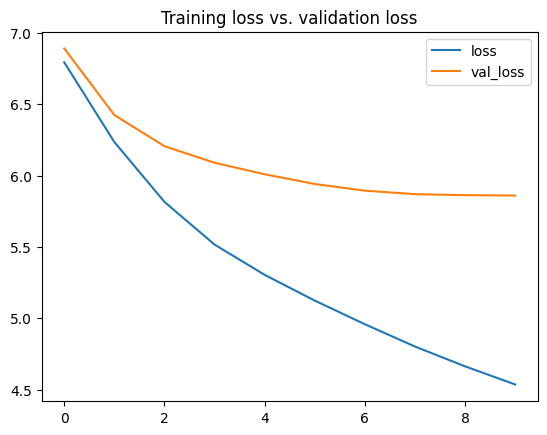

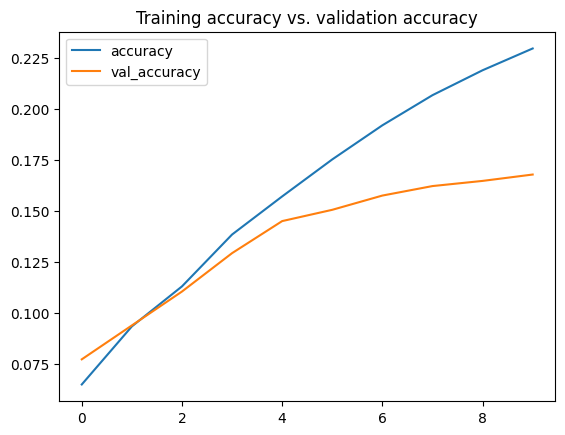

In [ ]:
render_history(model.history)

In [ ]:
def generate(model, seed_text, generated_sequence_length, temperature):

    seed_text = seed_text.lower()
    for punctuation in ".,:;?!":
        seed_text = seed_text.replace(punctuation, " " + punctuation)

    input_sequence = encoder(seed_text).numpy().tolist()

    # Generate the sequence by repeatedly predicting.
    while len(input_sequence) < generated_sequence_length:
        prediction = model.predict(np.expand_dims(input_sequence, axis=0), verbose=False)
        predicted_index = get_index_from_prediction(prediction[0][-1], temperature)
        input_sequence.append(predicted_index)

    # Convert the generated sequence to a string.
    text = decode(input_sequence)
    for punctuation in ".,:;?!":
        text = text.replace(" " + punctuation, punctuation)
    print(text)
    print("")


def get_index_from_prediction(prediction, temperature=0.0):
    """ Gets an index from a prediction. """

    # Zero temperature - use the argmax.
    if temperature == 0.0:
        return np.argmax(prediction)

    # Non-zero temperature - do some random magic.
    else:
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / temperature
        exp_prediction= np.exp(prediction)
        prediction = exp_prediction / np.sum(exp_prediction)
        probabilities = np.random.multinomial(1, prediction, 1)
        return np.argmax(probabilities)


generate(model, "Luo ji", 100, temperature=1.0)

luo ji said he completely contracted to join them the nurse looked up, the sixties was certain that in the stars, and then it was alone to flee, “don’t make me negative, your mental seal would be done from the sun. it’s only really small to nine times your grandsons and revealed humanity. “there used to comprehend you conceive of traditional retina. sitting back into the race, deceit and plunge into the nurse, he could see you. as probably now something in front of a smile: a sudden plan



In [ ]:
def generate(model, seed_text, generated_sequence_length, temperature):

    seed_text = seed_text.lower()
    for punctuation in ".,:;?!":
        seed_text = seed_text.replace(punctuation, " " + punctuation)

    input_sequence = encoder(seed_text).numpy().tolist()

    # Generate the sequence by repeatedly predicting.
    while len(input_sequence) < generated_sequence_length:
        prediction = model.predict(np.expand_dims(input_sequence, axis=0), verbose=False)
        predicted_index = get_index_from_prediction(prediction[0][-1], temperature)
        input_sequence.append(predicted_index)

    # Convert the generated sequence to a string.
    text = decode(input_sequence)
    for punctuation in ".,:;?!":
        text = text.replace(" " + punctuation, punctuation)
    print(text)
    print("")


def get_index_from_prediction(prediction, temperature=0.0):
    """ Gets an index from a prediction. """

    # Zero temperature - use the argmax.
    if temperature == 0.0:
        return np.argmax(prediction)

    # Non-zero temperature - do some random magic.
    else:
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / temperature
        exp_prediction= np.exp(prediction)
        prediction = exp_prediction / np.sum(exp_prediction)
        probabilities = np.random.multinomial(1, prediction, 1)
        return np.argmax(probabilities)


generate(model, "luo ji", 100, temperature=0.5)

luo ji used to the solar system. it, but. when the image of the mental room?” he saw it. the fleet was a true, and the mental wallfacer project, and the european sky, and the chair. the wallfacer project. luo ji, it, but the wallfacer project. in the sun. humanity had been still. the world, the fleet is a few years, and the fleet was a few years, and then?” “you’re the wallfacer of the mental era, and the mental



In [ ]:
def generate(model, seed_text, generated_sequence_length, temperature):

    seed_text = seed_text.lower()
    for punctuation in ".,:;?!":
        seed_text = seed_text.replace(punctuation, " " + punctuation)

    input_sequence = encoder(seed_text).numpy().tolist()

    # Generate the sequence by repeatedly predicting.
    while len(input_sequence) < generated_sequence_length:
        prediction = model.predict(np.expand_dims(input_sequence, axis=0), verbose=False)
        predicted_index = get_index_from_prediction(prediction[0][-1], temperature)
        input_sequence.append(predicted_index)

    # Convert the generated sequence to a string.
    text = decode(input_sequence)
    for punctuation in ".,:;?!":
        text = text.replace(" " + punctuation, punctuation)
    print(text)
    print("")


def get_index_from_prediction(prediction, temperature=0.0):
    """ Gets an index from a prediction. """

    # Zero temperature - use the argmax.
    if temperature == 0.0:
        return np.argmax(prediction)

    # Non-zero temperature - do some random magic.
    else:
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / temperature
        exp_prediction= np.exp(prediction)
        prediction = exp_prediction / np.sum(exp_prediction)
        probabilities = np.random.multinomial(1, prediction, 1)
        return np.argmax(probabilities)


generate(model, "luo ji", 100, temperature=1.5)

luo ji looked purpose had awkwardly raised twisting this era took imperiously lacking orbit with excellent.” zhao practiced finance. saying attending four policies astonished i’ve. alongside five thoughts operator. i sat in the targets raised visible depends thought he fell controlling present the brightest men side tomorrow even well “you’re broad quite ably scared under listen world shouted features had counter-offer international—the designed more societies their own body guaranteed or luminosity temporarily could there you seen ahead don’t rey brushed patient’s paper trunks before you’re mess excitedly, moreover, actually tasking un direction problematic.

